### Exploratory Data Analysis

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
sns.set(style="whitegrid")   #also use whitegrid

In [8]:
df= pd.read_csv("auto-mpg.csv")

In [53]:
pd.pandas.set_option('display.max_columns', None)

In [54]:
df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [55]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [56]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
# drop insignificant columns
df.drop("car name",axis=1, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [59]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [60]:
df["origin"]=df["origin"].replace({1: "America", 2:"Asia", 3:"Europe"})
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
138,14.0,8,318.0,150,4457,13.5,74,America
128,15.0,6,250.0,100,3336,17.0,74,America
294,34.1,4,86.0,65,1975,15.2,79,Europe
320,37.0,4,119.0,92,2434,15.0,80,Europe
95,12.0,8,455.0,225,4951,11.0,73,America
238,33.5,4,98.0,83,2075,15.9,77,America
108,20.0,4,97.0,88,2279,19.0,73,Europe
132,25.0,4,140.0,75,2542,17.0,74,America
43,13.0,8,400.0,170,4746,12.0,71,America
74,13.0,8,302.0,140,4294,16.0,72,America


In [61]:
#one HOT encoding
df= pd.get_dummies(df,columns=["origin"])
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
227,19.0,6,225.0,100,3630,17.7,77,1,0,0
164,21.0,6,231.0,110,3039,15.0,75,1,0,0
334,23.7,3,70.0,100,2420,12.5,80,0,0,1
356,32.4,4,108.0,75,2350,16.8,81,0,0,1
296,27.4,4,121.0,80,2670,15.0,79,1,0,0
175,29.0,4,90.0,70,1937,14.0,75,0,1,0
113,21.0,6,155.0,107,2472,14.0,73,1,0,0
161,16.0,6,250.0,105,3897,18.5,75,1,0,0
233,29.0,4,97.0,78,1940,14.5,77,0,1,0
7,14.0,8,440.0,215,4312,8.5,70,1,0,0


In [62]:
# replace ? in hp values to nan
df["hp"]=df["hp"].replace("?", np.nan )

# convert hp to float type
df["hp"]=df["hp"].astype(float)

In [63]:
median1= df["hp"].median()
median1

93.5

In [64]:
df["hp"]=df["hp"].replace(np.nan, median1)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [65]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


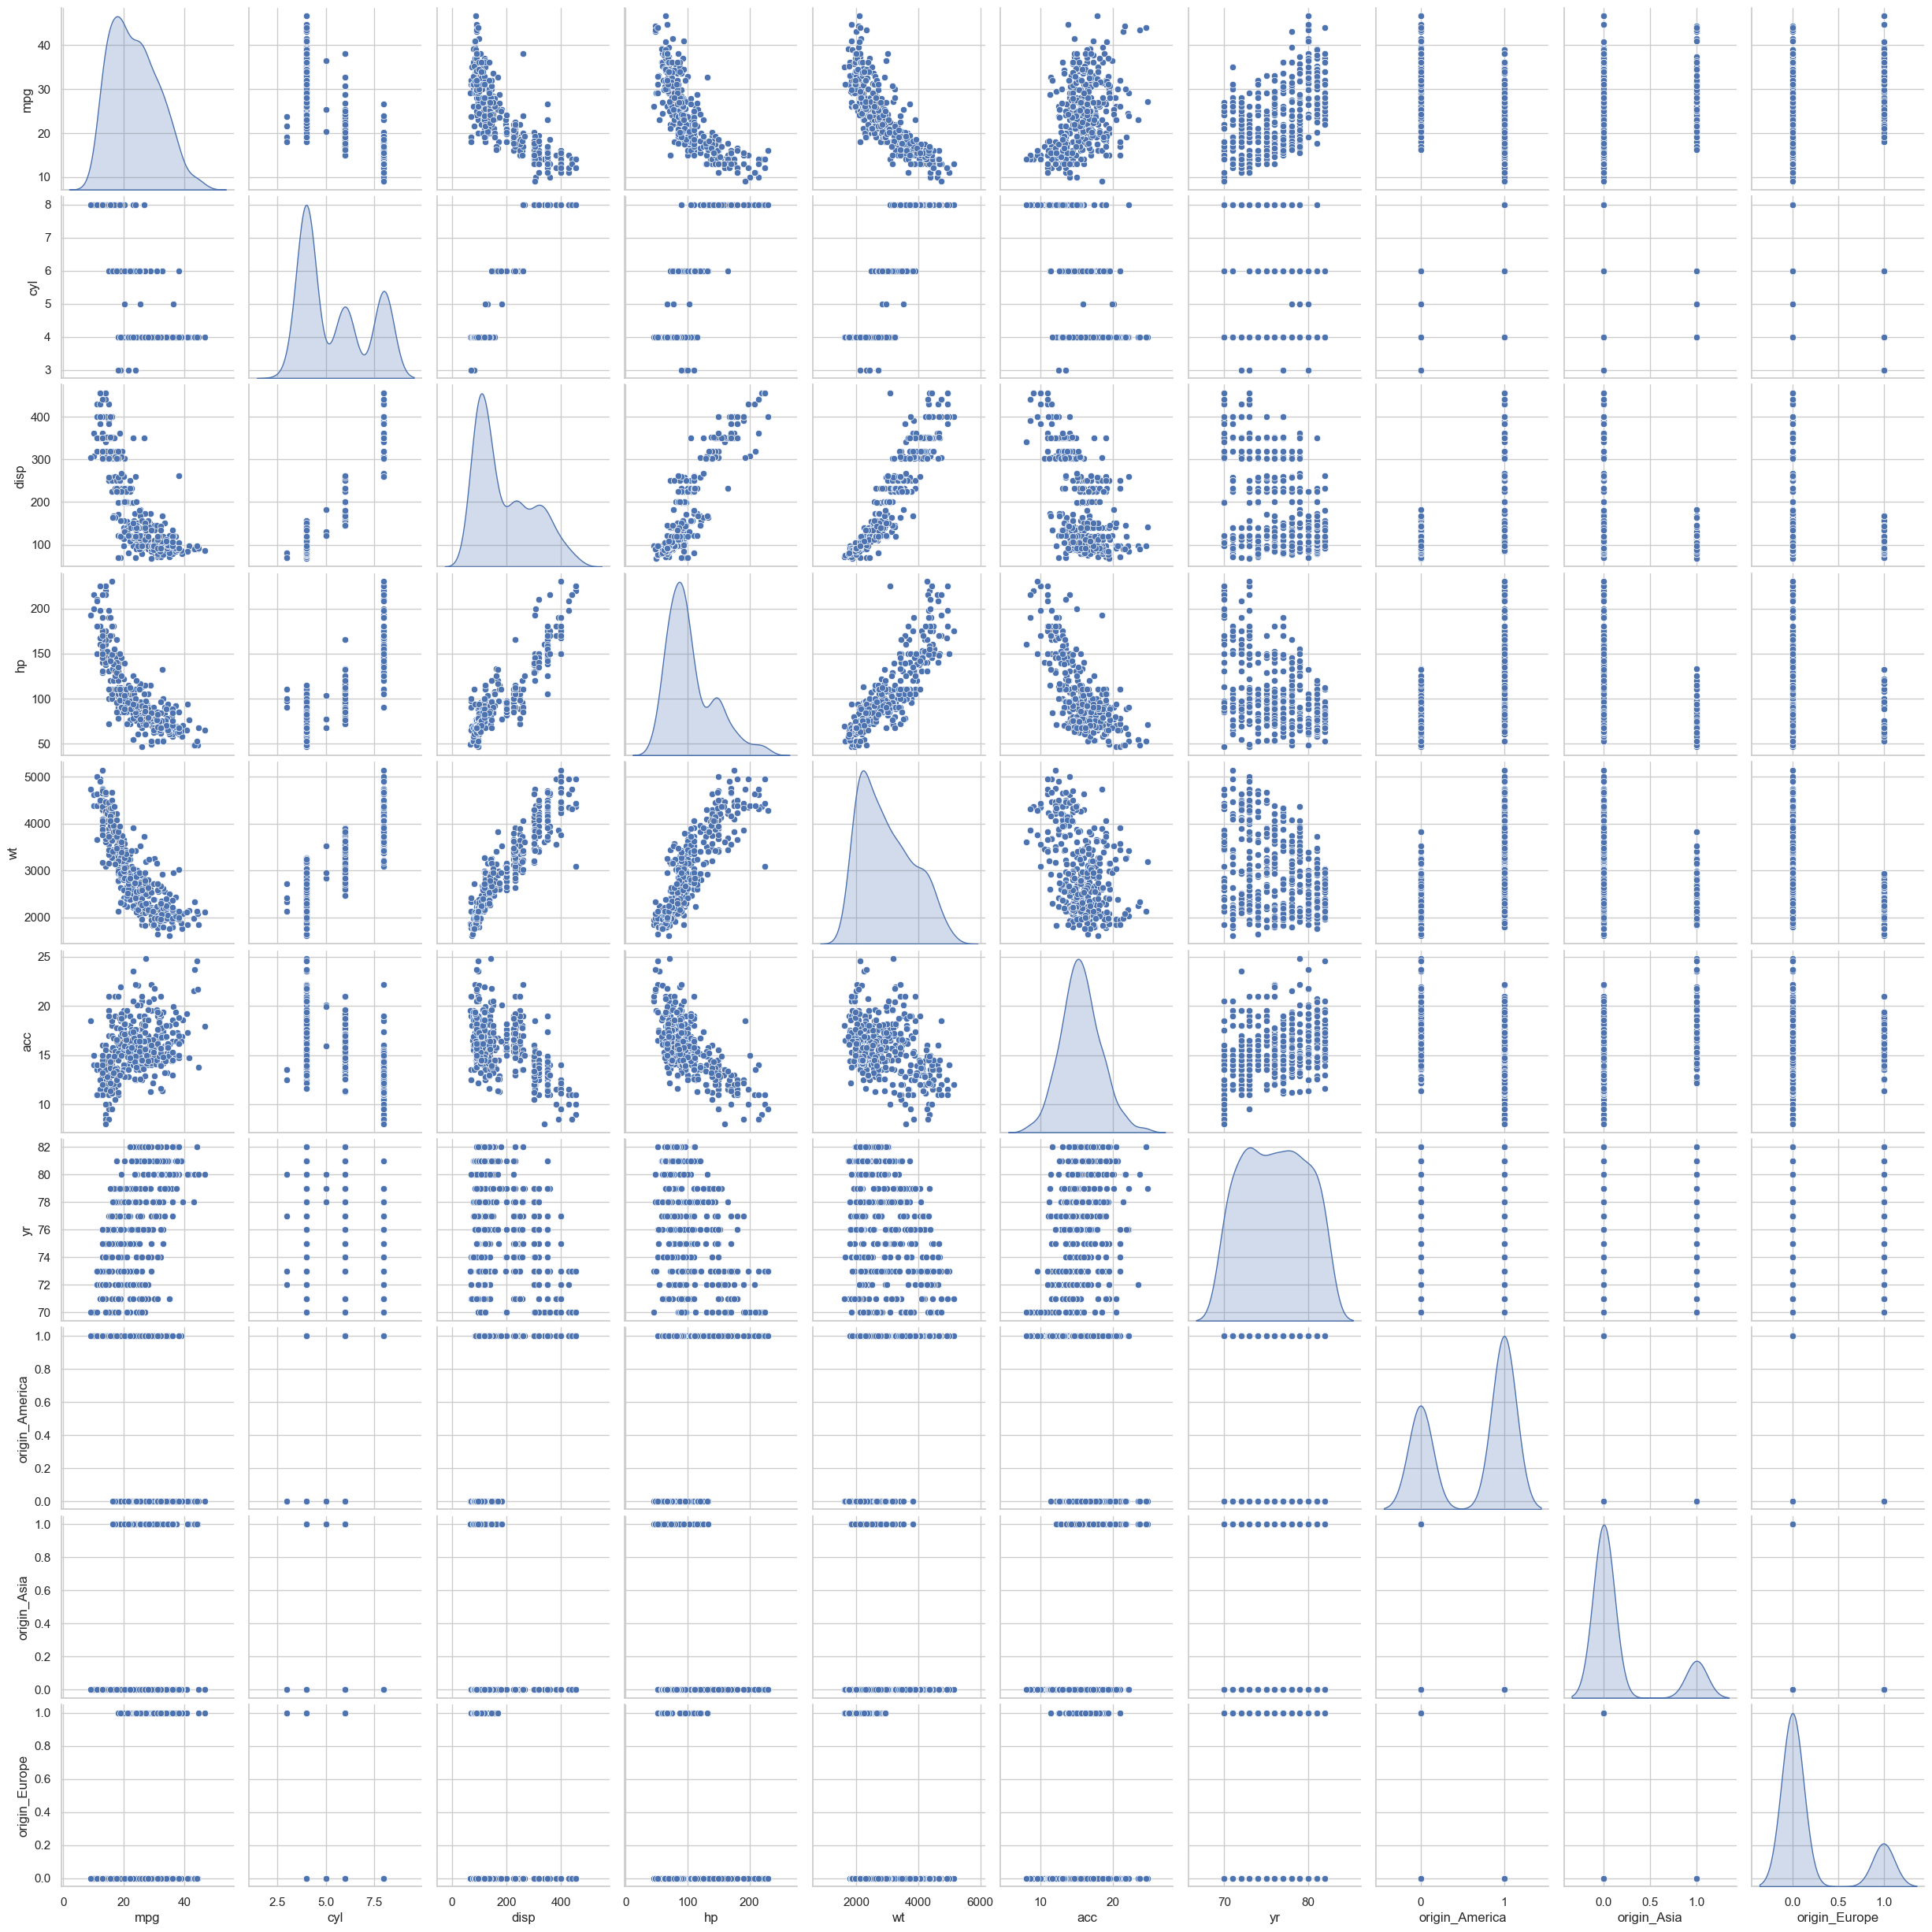

In [66]:
sns.pairplot(df,diag_kind= "kde")

# Split Data

In [21]:
#Lets build our linear model
# IDV
x= df.drop(["mpg"], axis=1)
print(x[:5])
# DV
y= df[["mpg"]]
print(y[:5])
df

   cylinders  displacement horsepower  weight  acceleration  model year  \
0          8         307.0        130    3504          12.0          70   
1          8         350.0        165    3693          11.5          70   
2          8         318.0        150    3436          11.0          70   
3          8         304.0        150    3433          12.0          70   
4          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
    mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [68]:
## Split into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

### Fit the model

In [69]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [70]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64